In [1]:
import pandas as pd
import numpy as np
import glob
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Bidirectional, Dense, Flatten
from tensorflow.keras.optimizers import Adam

# Define the path to the directory containing the feature files
directory_path = '/content/drive/MyDrive/FYP_dataset/features'

# Get a list of all feature file paths in the directory
feature_files = glob.glob(directory_path + '/*.csv')

# Define lists to store the feature and target data
X = []
y_a = []
y_v = []

# Iterate over each feature file
for file in feature_files:
    # Read the feature file into a DataFrame
    df = pd.read_csv(file)

    # Extract the features and target variables
    features = df.drop(['Arousal_Value', 'Valence_Value','frameTime'], axis=1).values
    arousal = df['Arousal_Value'].values
    valence = df['Valence_Value'].values

    # Append the data to the lists
    X.append(features)
    y_a.append(arousal)
    y_v.append(valence)

# Concatenate the feature and target arrays
X = np.concatenate(X)
y_a = np.concatenate(y_a)
y_v = np.concatenate(y_v)

# Split the data into training and testing sets
X_train, X_test, y_a_train, y_a_test, y_v_train, y_v_test = train_test_split(X, y_a, y_v, test_size=0.2, random_state=42)

# Scale the features
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape the input data for LSTM
X_train_reshaped = X_train_scaled.reshape(X_train_scaled.shape[0], X_train_scaled.shape[1], 1)
X_test_reshaped = X_test_scaled.reshape(X_test_scaled.shape[0], X_test_scaled.shape[1], 1)

# Build the BiLSTM model for Arousal
model_a = Sequential()
model_a.add(Bidirectional(LSTM(64, return_sequences=True), input_shape=(X_train_reshaped.shape[1], 1)))
model_a.add(Flatten())
model_a.add(Dense(1))
model_a.compile(loss='mse', optimizer=Adam())

# Train the Arousal model
model_a.fit(X_train_reshaped, y_a_train, epochs=10, batch_size=32)

# Evaluate the Arousal model
loss_a = model_a.evaluate(X_test_reshaped, y_a_test)
print("Arousal Model Loss:", loss_a)

# Make predictions for Arousal
predictions_a = model_a.predict(X_test_reshaped)

# Build the BiLSTM model for Valence
model_v = Sequential()
model_v.add(Bidirectional(LSTM(64, return_sequences=True), input_shape=(X_train_reshaped.shape[1], 1)))
model_v.add(Flatten())
model_v.add(Dense(1))
model_v.compile(loss='mse', optimizer=Adam())

# Train the Valence model
model_v.fit(X_train_reshaped, y_v_train, epochs=10, batch_size=32)

# Evaluate the Valence model
loss_v = model_v.evaluate(X_test_reshaped, y_v_test)
print("Valence Model Loss:", loss_v)

# Make predictions for Valence
predictions_v = model_v.predict(X_test_reshaped)


Epoch 1/10
2654/2654 [==============================] - 384s 144ms/step - loss: 0.0454
Epoch 2/10
2654/2654 [==============================] - 373s 141ms/step - loss: 0.0408
Epoch 3/10
2654/2654 [==============================] - 371s 140ms/step - loss: 0.0398
Epoch 4/10
2654/2654 [==============================] - 370s 139ms/step - loss: 0.0393
Epoch 5/10
2654/2654 [==============================] - 369s 139ms/step - loss: 0.0386
Epoch 6/10
2654/2654 [==============================] - 369s 139ms/step - loss: 0.0381
Epoch 7/10
2654/2654 [==============================] - 370s 139ms/step - loss: 0.0377
Epoch 8/10
2654/2654 [==============================] - 377s 142ms/step - loss: 0.0374
Epoch 9/10
2654/2654 [==============================] - 374s 141ms/step - loss: 0.0370
Epoch 10/10
664/664 [==============================] - 26s 38ms/step - loss: 0.0395
Arousal Model Loss: 0.0394703634083271
664/664 [==============================] - 25s 38ms/step
Epoch 1/10
2654/2654 [===============

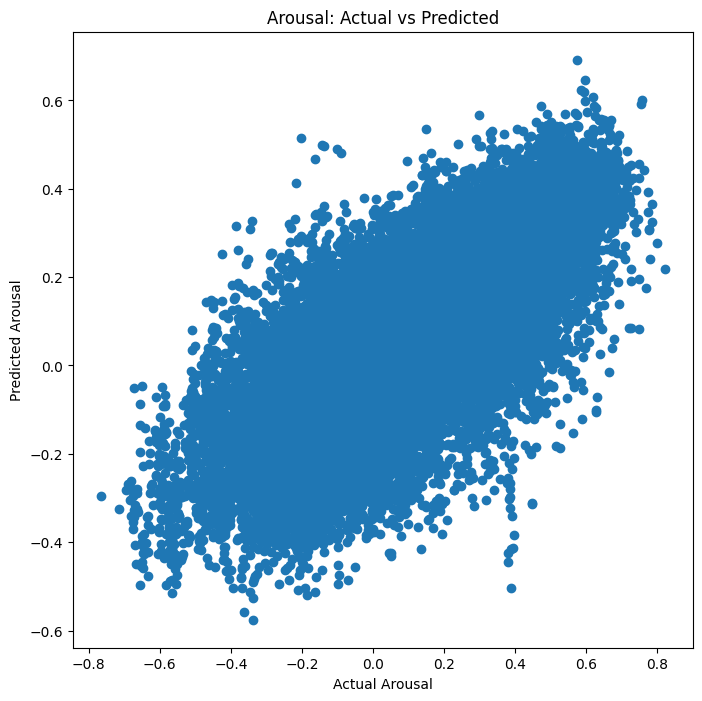

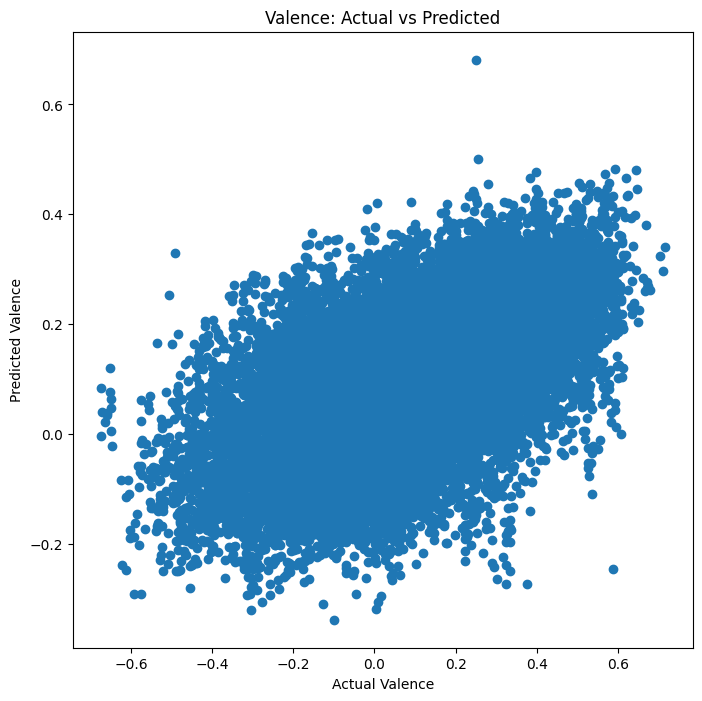

Arousal Model Evaluation:
Mean Squared Error (MSE): 0.039470341903910286
Mean Absolute Error (MAE): 0.16035085110337058
Root Mean Squared Error (RMSE): 0.19867144209450507
R2 Score: 0.5107672363395532
Valence Model Evaluation:
Mean Squared Error (MSE): 0.036561514922003616
Mean Absolute Error (MAE): 0.1534658115828428
Root Mean Squared Error (RMSE): 0.19121065587985314
R2 Score: 0.33773150410543884


In [5]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate additional evaluation metrics
mse_a = mean_squared_error(y_a_test, predictions_a)
mae_a = mean_absolute_error(y_a_test, predictions_a)
rmse_a = np.sqrt(mse_a)
r2_a = r2_score(y_a_test, predictions_a)

mse_v = mean_squared_error(y_v_test, predictions_v)
mae_v = mean_absolute_error(y_v_test, predictions_v)
rmse_v = np.sqrt(mse_v)
r2_v = r2_score(y_v_test, predictions_v)

# Plot the predicted values against the actual values for Arousal
plt.figure(figsize=(8, 8))
plt.scatter(y_a_test, predictions_a)
plt.xlabel('Actual Arousal')
plt.ylabel('Predicted Arousal')
plt.title('Arousal: Actual vs Predicted')
plt.show()

# Plot the predicted values against the actual values for Valence
plt.figure(figsize=(8, 8))
plt.scatter(y_v_test, predictions_v)
plt.xlabel('Actual Valence')
plt.ylabel('Predicted Valence')
plt.title('Valence: Actual vs Predicted')
plt.show()

# Print the evaluation metrics for Arousal
print("Arousal Model Evaluation:")
print("Mean Squared Error (MSE):", mse_a)
print("Mean Absolute Error (MAE):", mae_a)
print("Root Mean Squared Error (RMSE):", rmse_a)
print("R2 Score:", r2_a)

# Print the evaluation metrics for Valence
print("Valence Model Evaluation:")
print("Mean Squared Error (MSE):", mse_v)
print("Mean Absolute Error (MAE):", mae_v)
print("Root Mean Squared Error (RMSE):", rmse_v)
print("R2 Score:", r2_v)

